<a href="https://colab.research.google.com/github/EdSang24/Week-4_KNN-NAIVE-BAYES/blob/main/KNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Defining the Question**

**a)Research Question**

Create a model that predict if a passenger in the titanic survived or not.

**b)Metrics of Success**

Our model would be considered a success if it is able to compute an accuracy score of at least 80%.

**c)Understanding the Context**

RMS Titanic was a British passenger liner, operated by the White Star Line, which sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg during her maiden voyage from Southampton, UK, to New York City. We are to create a model that can be used to classify if a passenger survived or perished in the incident.

**d)Experimental Design**



*   Reading and checking the dataset

*   Cleaning the data
*   Performing EDA


*   Creating our KNN models

*   Conclusion



**e) Data Relevance**

The dataset is from kaggle using the following links:

https://archive.org/download/train5_202002/train%20%285%29.csv

https://archive.org/download/test1_202002/test%20%281%29.csv

# **Reading the Data**

In [261]:
# Importing the libraries.

import pandas as pd
import numpy as np

In [262]:
# Loading our train dataset.

train=pd.read_csv('/content/train (5).csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [263]:
# Loading our test dataset.

test=pd.read_csv('/content/test (1).csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# **Checking our Dataset**

In [264]:
# Previewing the top of our train dataset.

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [265]:
# Previewing the top of our test set.

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [266]:
# Previewing the bottom of our train set.

train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [267]:
# Previewing the bottom of our test set.

test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [268]:
# checking the number of records in our train dataset.

train.shape

(891, 12)

In [269]:
# checking the number of records in our test dataset.

test.shape

(418, 11)

In [270]:
# Checking the data types of our columns in our train dataset.

train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [271]:
# Checking the data types of our columns in our test dataset.

test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# **Tyding our Dataset**

In [272]:
# Checking for null values in our train set.

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [273]:
# Filling the missing values in the age column with mean age in our train set.

train['Age']=train['Age'].fillna(train['Age'].mean())

In [274]:
#dropping the null values in the Embarked column

train = train.dropna(subset = ['Embarked'])
print("Missing values in train's Embarked column:", train.Embarked.isna().any())

Missing values in train's Embarked column: False


In [275]:
# Checking for duplicates in the train set

train.duplicated().sum()

0

In [276]:
#checking for missing values in train set
train = train.fillna(train.Age.mean())
print("Missing values in Train dataset:")
print(train.isna().any())

Missing values in Train dataset:
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool


In [277]:
#converting the age column to integers

train = train.astype({'Age' : 'int'})

In [278]:
# Checking for missing values in the test dataset.

test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [279]:
# Filling the missing values in the age column with the mean age in test set

test['Age']=test['Age'].fillna(test['Age'].mean())

In [280]:
# Checking for duplicates in the test set

test.duplicated().sum()

0

In [281]:
# Dropping the unnecessary column features in our train dataset.

train.drop(['PassengerId','Name','Cabin','Ticket','Fare'], axis=1, inplace=True)

In [282]:
# Dropping the unnecessary column features in our test dataset.

test.drop(['PassengerId','Cabin','Name','Ticket','Fare'],axis=1,inplace=True)

We are dropping the passengerId, name, ticket and fare columns since they are not crucial in predicting the passegers survival. We also dropping the cabin column since it has many missing values.

In [283]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()

# columns to encode
to_encode = ['Sex', 'Embarked']

# dictionary to store each unique variable class
class_dict = {}

for item in to_encode:
    encoder = LabelEncoder().fit(train[item].unique())
    classed = encoder.classes_
    class_dict[item] = classed
    # encoding in 'train' dataset
    train[item] = encoder.transform(train[item].values)

# to decode, use the following structure
class_dict['Sex'][0]

'female'

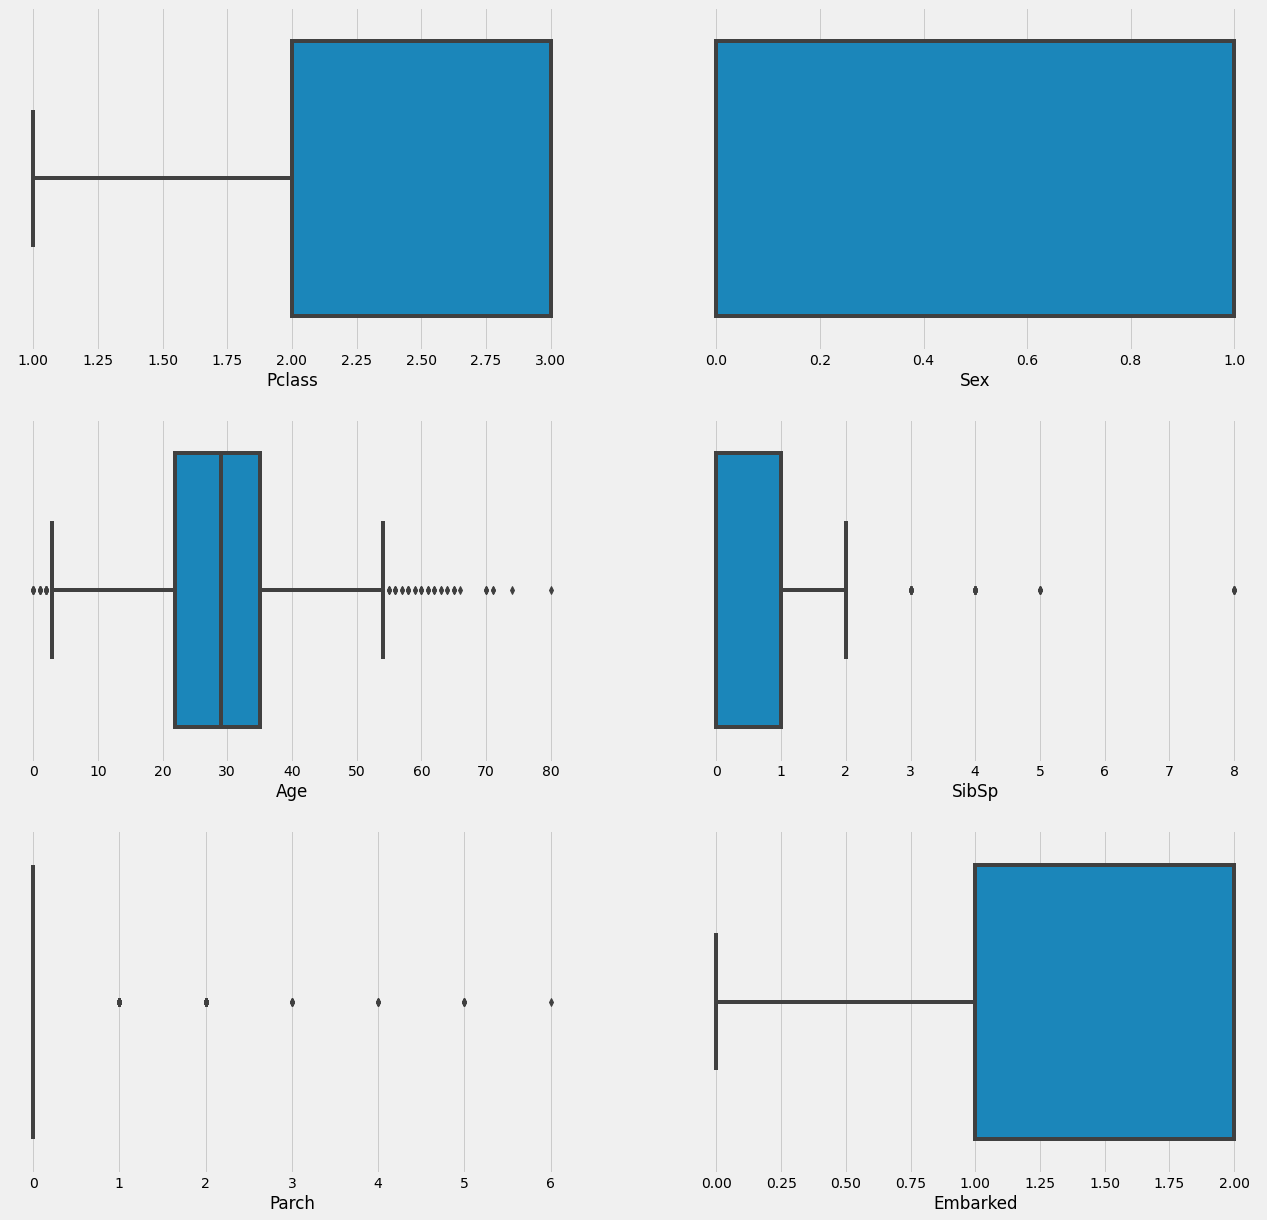

In [284]:
# Checking for outliers in our train dataset.

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
f, axes = plt.subplots(3,2, figsize=(20,20))

sns.boxplot(data=train,x='Pclass', ax=axes[0,0])
sns.boxplot(data=train,x='Sex', ax=axes[0,1])
sns.boxplot(data=train,x='Age', ax=axes[1,0])
sns.boxplot(data=train,x='SibSp', ax=axes[1,1])
sns.boxplot(data=train,x='Parch', ax=axes[2,0])
sns.boxplot(data=train,x='Embarked', ax=axes[2,1])

Since our model has many outliers, will keep the outliers since removing them will remove key variables in creating our model.

# **Exploratory Data Analysis**

***Univariate analysis***

In [285]:
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.498313,0.524184,0.382452,1.535433
std,0.486260,0.834700,0.477538,12.979638,1.103705,0.806761,0.792088
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,2.000000


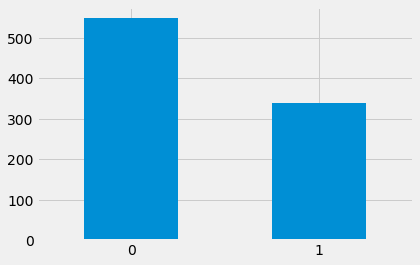

In [286]:
# viewing the countplot of those who survived vs those who didn't
train.Survived.value_counts().plot(kind = 'bar', rot = 0, figsize = [6, 4])

Majority of the passengers did not survive

In [287]:
# distribution of passengers across classes
train.Pclass.value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

most of the passengers were in 3rd class then 1st class and the least number were in 2nd class.

In [288]:
# distribution of passengers according to gender

train.Sex.value_counts()

1    577
0    312
Name: Sex, dtype: int64

From the distribution male passengers(577) were more than the female passengers(312)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


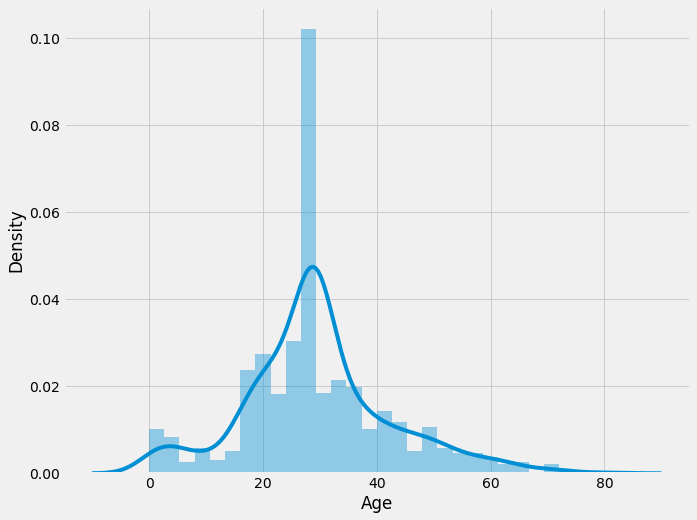

In [289]:
# visualized distribution of gender

fig, ax = plt.subplots(figsize = (10, 8))
sns.distplot(train.Age, ax = ax)

***Bivariate Analysis***

Survived  Pclass
0         3         372
          2          97
          1          80
1         1         134
          3         119
          2          87
Name: Pclass, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


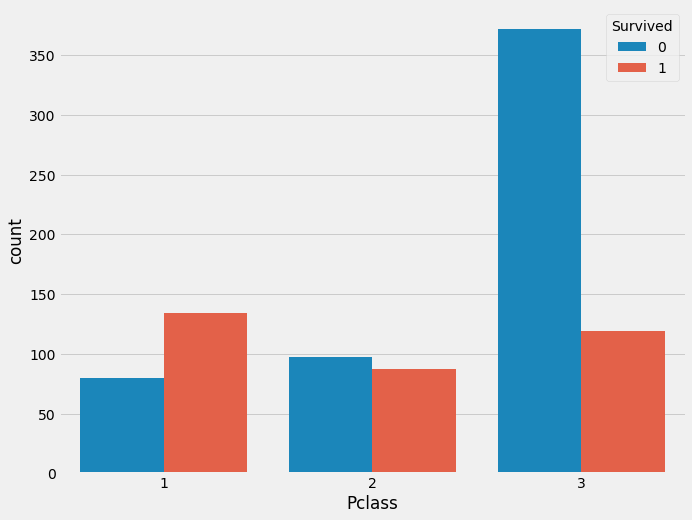

In [290]:
# checking survival status by class

print(train.groupby('Survived').Pclass.value_counts())

fig, ax = plt.subplots(figsize = (10, 8))
sns.countplot('Pclass', hue = 'Survived', data = train, ax = ax)

The distribution of those who did not survive was as follows;


*   3rd class-372
*   2nd class-97

*   1st class-80

The distribution of the survivers was as follows;


*   1st class- 134
*   3rd class- 119
*   2nd class- 87








Survived  Sex
0         1      468
          0       81
1         0      231
          1      109
Name: Sex, dtype: int64


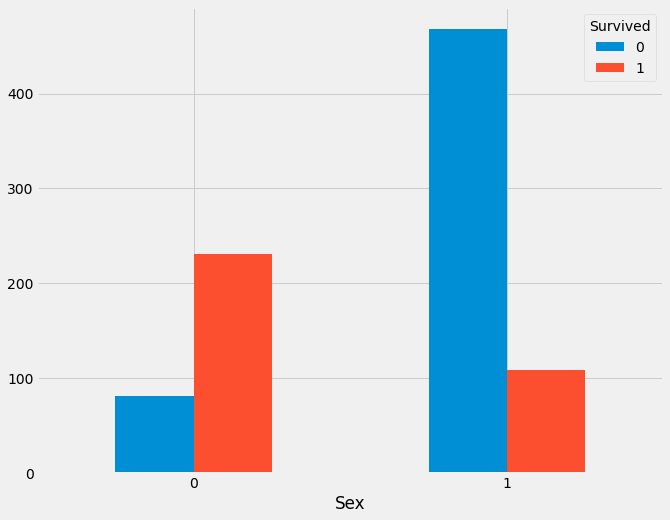

In [291]:
# survival status by gender
print(train.groupby('Survived').Sex.value_counts())
pd.crosstab(train.Sex, train.Survived).plot(kind = 'bar', rot = 0, figsize = [10, 8])

The majority of gender which survived were the females who were 231 while majority of those who perished were male with 468

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


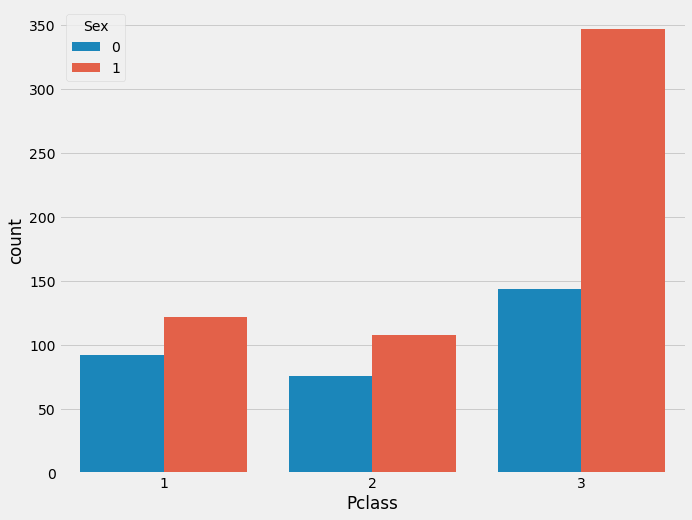

In [292]:
# distribution of class vs gender

fig, ax = plt.subplots(figsize = (10, 8))
sns.countplot('Pclass', hue = 'Sex', data = train, ax = ax)

In all the three classes the number of male passengers was higher than the females

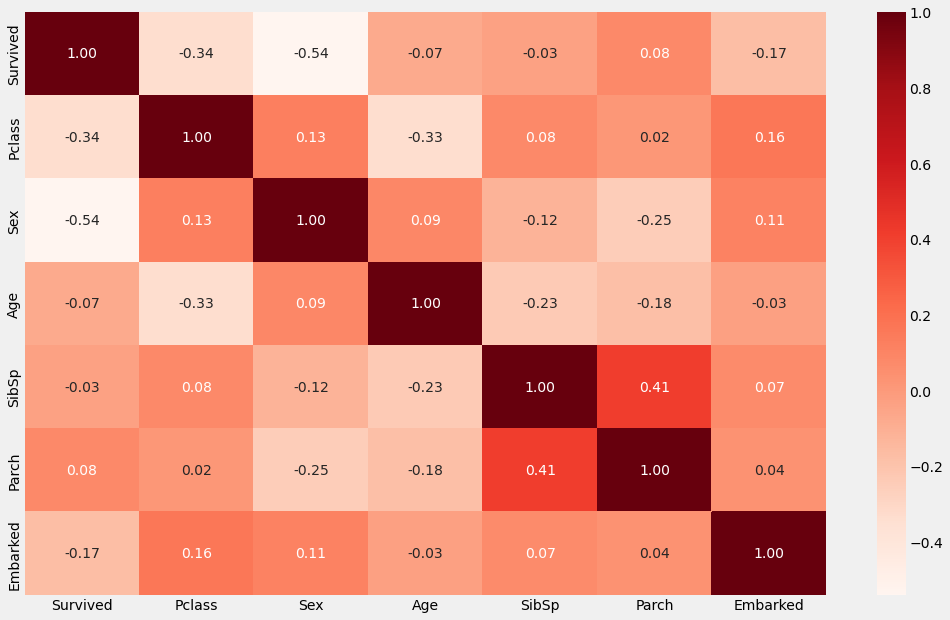

In [293]:
# checking for multicollinearity

plt.figure(figsize=(16,10))
sns.heatmap(train.corr(),annot=True,cmap="Reds",fmt=".2f");
plt.show()


The variables have a weak correlation thus we shall keep all the features

In [294]:
# creating the VIF scores

correlations =train.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
Survived,1.654003,0.506412,0.823767,0.259452,0.148316,0.037864,0.101202
Pclass,0.506412,1.338127,0.087966,0.481615,0.023734,0.037433,-0.135180
Sex,0.823767,0.087966,1.517897,0.024064,0.093749,0.273470,-0.059050
Age,0.259452,0.481615,0.024064,1.245228,0.219338,0.105282,-0.026043
SibSp,0.148316,0.023734,0.093749,0.219338,1.264579,-0.473110,-0.051565
Parch,0.037864,0.037433,0.273470,0.105282,-0.473110,1.280416,-0.046458
Embarked,0.101202,-0.135180,-0.059050,-0.026043,-0.051565,-0.046458,1.050730


We can see that the VIF scores are low thus showing weak collinearity among the variables

# **Modelling**

***K Nearest Neighbour(KNN)***

In [295]:
# splitting our data into attributes and label
X = train.drop(columns = ['Survived']).values
y = train['Survived'].values
print(X.shape)
print(y.shape)

(889, 6)
(889,)


***KNN without splitting***

In [296]:
from sklearn.neighbors import KNeighborsClassifier

# fitting the classifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X, y)

# making predictions
y_pred = classifier.predict(X)

# evaluating the classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy score:",accuracy_score(y, y_pred))

print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

Accuracy score: 0.8503937007874016
[[498  51]
 [ 82 258]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       549
           1       0.83      0.76      0.80       340

    accuracy                           0.85       889
   macro avg       0.85      0.83      0.84       889
weighted avg       0.85      0.85      0.85       889



The accuracy of the model without splitting is 85%

***KNN with splitting***

### **80-20 split**

In [297]:
# Now we can split our dataset into our training and test sets.

from sklearn.model_selection import train_test_split

X=train.drop('Survived',axis=1)
y=train['Survived']

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=.2, random_state=0)

In [298]:
# finding the best value for K

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Creating a parameter grid for the best K value we will use.
param_grid={
    'n_neighbors':[2,4,6,8,10,12,14,16,18,20,22,26,28,30,32,34,36,38,40]
}

# Building our GridSearch model to find the best parameter.
classifier=KNeighborsClassifier()

CV_classifier=GridSearchCV(estimator=classifier, param_grid=param_grid,cv=5)
CV_classifier.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22,
                                         26, 28, 30, 32, 34, 36, 38, 40]})

In [299]:
# finding the best parameter

print(CV_classifier.best_params_)

{'n_neighbors': 6}


In [300]:
# finding our KNN using the parameter

classifier=KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [301]:
# finding our prediction

y_pred=classifier.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0])

In [302]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.6741573033707865
[[88 17]
 [41 32]]


The model gives us an accuracy score of 67.4% with 120 correct predictions and 58 incorrect predictions.

## **70 - 30 split**

In [303]:
# Splitting our train and test sets.

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=.3, random_state=0)

# Creating a parameter grid for the best K value we will use.
param_grid={
    'n_neighbors':[2,4,6,8,10,12,14,16,18,20,22,26,28,30,32,34,36,38,40]
}

# Building our GridSearch model to find the best parameter.
classifier=KNeighborsClassifier()

CV_classifier=GridSearchCV(estimator=classifier, param_grid=param_grid,cv=5)
CV_classifier.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22,
                                         26, 28, 30, 32, 34, 36, 38, 40]})

In [304]:
# Finding the best parameters.

print(CV_classifier.best_params_)

{'n_neighbors': 6}


In [305]:
# finding our KNN using the parameter

classifier=KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [306]:
# Making our predictions.

y_pred=classifier.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [307]:
# checking our model accuracy

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7116104868913857
[[141  16]
 [ 61  49]]


Our 70-30 split brings an accuracy of 71.1% with the number of correct values as 190 and the incorrect values as 77 which are both slightly higher than our 80-20 split

## **60-40 split**

In [308]:
# Splitting the training and test sets.
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=.4, random_state=0)

# Creating a parameter grid for the best K value we will use.
param_grid={
    'n_neighbors':[2,4,6,8,10,12,14,16,18,20,22,26,28,30,32,34,36,38,40]
}

# Building our GridSearch model to find the best parameter.
classifier=KNeighborsClassifier()

CV_classifier=GridSearchCV(estimator=classifier, param_grid=param_grid,cv=5)
CV_classifier.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22,
                                         26, 28, 30, 32, 34, 36, 38, 40]})

In [309]:
# Finding the best parameter.

print(CV_classifier.best_params_)

{'n_neighbors': 6}


In [310]:
# Fitting our model.

classifier=KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [311]:
# Making our prediction.

y_pred=classifier.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [312]:
# Checking our models accuracy and the number of correct and incorrect predictions.

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7106741573033708
[[196  20]
 [ 83  57]]


Our 60-40 split has an accuracy of 71% with 253 correct predictions and 103 incorrect predictions which is higher than both the 80-20 and the 70-30 splits.

## **Challenging the Solution**

In [313]:
# Reviewing the Solution 
# Let's fit the model on Random Forest Classifier to challenge our solution

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)


from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predicting
y_pred = forest.predict(X_test)

from sklearn import metrics


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3083177727079667
Mean Squared Error: 0.19238538186456738
Root Mean Squared Error: 0.4386175804326217


# **Conclusion**

From our model we can say that we can say that the models have no underfitting or overfitting in our train data and the best model to use is the one with the highest accuracy score which is the 70-30 split with an accuracy of 71.1%.